In [35]:
import numpy as np
import json
import cv2 as cv
import rasterio
import os
os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = pow(2,40).__str__()
import cv2 as cv
from glob import glob
from matplotlib import pyplot as plt


In [2]:
%autosave 120

Autosaving every 120 seconds


In [15]:
import numpy as np
import json
import pandas as pd
import cv2 as cv
import rasterio
import os
os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = pow(2,40).__str__()
import cv2 as cv
from glob import glob
from matplotlib import pyplot as plt
from tqdm import tqdm

def dice(pred, true, k = 1):
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

score_df = pd. DataFrame(columns=['file_number','Dice_score'])
pred_file_list=glob('/u/athbagde/hubmap_solution_victor/op_im/*Hand*.ome.tif')
fnums = [x.split('/')[-1].split('.')[0].lstrip('test_pred_1472') for x in pred_file_list]
gt_paths = [f'/u/athbagde/hubmap_solution_victor/hubmap_data/data/hubmap/colon/gt_masks/{x}.json' for x in fnums]

for i,pred_path in tqdm(enumerate(pred_file_list)):
    data = rasterio.open(pred_path)
    pred_img = np.squeeze(data.read([1]))
    mask = np.zeros_like(pred_img).astype('float32')
    f=open(gt_paths[i])
    d_l = json.loads(f.read())
    f.close()
    cnt_list=[np.array(ann['geometry']['coordinates'][0]) for ann in d_l]
    color = [255, 255, 255]
    for cnt in cnt_list:
        cv.fillPoly(mask,pts=np.int32([cnt]) ,color=color)
    mask[mask==255]=1
    score = dice(pred_img,mask,k=1)
    score_df.loc[len(score_df.index)] =[fnums[i],score]

score_df.to_csv('dice_score_colon.csv',index= False)






0it [00:00, ?it/s]/u/athbagde/anaconda3/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)
2it [00:01,  1.59it/s]


In [11]:
lol = 'test_pred_1472_CL_HandE_1234_B004_bottomleft'

In [14]:
lol.strip('')

'test_pred_1472_CL_HandE_1234_B004_bottomleft'

In [47]:
import pandas as pd
score_df = pd. DataFrame(columns=['file_number','Dice_score'])
score_df.loc[len(score_df.index)] =['fnums[i],score',23]


In [48]:
score_df.to_csv('lol.csv',index=False)

In [38]:
def dice(pred, true, k = 1):
    intersection = np.sum(pred[true==k]) * 2.0
    dice = intersection / (np.sum(pred) + np.sum(true))
    return dice

In [12]:
data =rasterio.open('/u/athbagde/hubmap_solution_victor/op_im/test_pred_1472_e464d2f6c.ome.tif')

/u/athbagde/anaconda3/lib/python3.10/site-packages/rasterio/__init__.py:304: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix will be returned.
  dataset = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


In [22]:
hb_img = np.squeeze(data.read([1]))

In [14]:
f=open('/u/athbagde//hubmap_solution_victor/op_im/e464d2f6c.json')
d_l = json.loads(f.read())

In [24]:
mask = np.zeros_like(hb_img).astype('float32')

In [25]:
cnt_list=[np.array(ann['geometry']['coordinates'][0]) for ann in d_l]

In [26]:
color = [255, 255, 255]
for cnt in cnt_list:
    cv.fillPoly(mask,pts=np.int32([cnt]) ,color=color)

[[13362  6593]
 [13297  6599]
 [13269  6660]
 [13275  6758]
 [13278  6764]
 [13278  6774]
 [13305  6818]
 [13357  6847]
 [13365  6847]
 [13368  6849]
 [13391  6849]
 [13408  6850]
 [13412  6849]
 [13419  6849]
 [13420  6848]
 [13438  6848]
 [13446  6841]
 [13455  6840]
 [13480  6817]
 [13493  6787]
 [13509  6762]
 [13508  6757]
 [13509  6757]
 [13509  6752]
 [13513  6744]
 [13509  6723]
 [13509  6718]
 [13507  6713]
 [13505  6703]
 [13502  6699]
 [13502  6696]
 [13495  6687]
 [13491  6678]
 [13478  6665]
 [13474  6661]
 [13436  6613]
 [13421  6608]
 [13417  6607]
 [13392  6599]
 [13385  6599]
 [13362  6593]]
[[29880 11702]
 [29875 11703]
 [29836 11713]
 [29832 11714]
 [29804 11740]
 [29756 11782]
 [29754 11788]
 [29749 11793]
 [29734 11834]
 [29718 11864]
 [29710 11936]
 [29720 11971]
 [29737 11984]
 [29749 11999]
 [29751 12002]
 [29762 12004]
 [29764 12004]
 [29770 12009]
 [29774 12008]
 [29779 12010]
 [29787 12008]
 [29802 12011]
 [29815 12003]
 [29832 12000]
 [29839 11994]
 [29842 1

In [27]:
mask[mask==255]=1

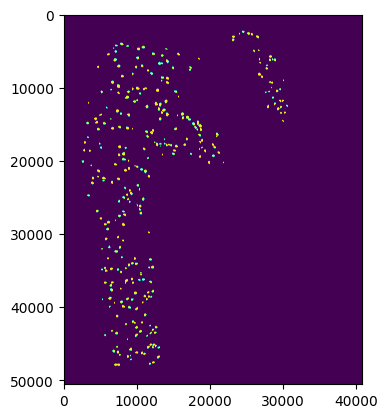

In [28]:
plt.imshow(mask)

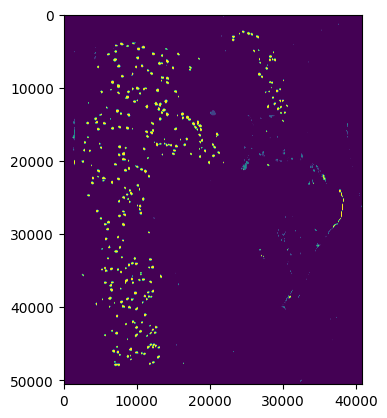

In [29]:
plt.imshow(hb_img)

In [33]:
dice(hb_img,mask,k=1)

0.9100701622152114